<a href="https://colab.research.google.com/github/Rohanmore123/Walamart_sales_forecasting/blob/main/Walmart_sales_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This Project deals with prediction  of loan approval status of different IDs based on various useful features**

Importing some useful basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import time
from datetime import timedelta
!pip install pmdarima


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Loading data from google drive

In [ ]:
stores_df=pd.read_csv("/content/drive/MyDrive/CSV Files/walmart sales/stores.csv")
train_df=pd.read_csv("/content/drive/MyDrive/CSV Files/walmart sales/train.csv")
features_df=pd.read_csv("/content/drive/MyDrive/CSV Files/walmart sales/features.csv")

In [ ]:
df = train_df.merge(features_df, on=['Store', 'Date'], how='inner').merge(stores_df, on=['Store'], how='inner')
df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


Checking unique values and null entries present in each column

In [ ]:
#checking the unique values
for col in df.columns.values:
  list_vals = pd.unique(df[col])
  print(col + " is of type " + str(df[col].dtypes) + " has " + str(len(list_vals)) + " unique values, and " + str(df[col].isnull().sum(axis=0)) + " null entries")
  if len(list_vals) < 10:
    list_str=""
    for n_value in range (0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ','
    print("These are: " + list_str[0:len(list_str)-1])

Store is of type int64 has 45 unique values, and 0 null entries
Dept is of type int64 has 81 unique values, and 0 null entries
Date is of type object has 143 unique values, and 0 null entries
Weekly_Sales is of type float64 has 359464 unique values, and 0 null entries
IsHoliday_x is of type bool has 2 unique values, and 0 null entries
These are: False,True
Temperature is of type float64 has 3528 unique values, and 0 null entries
Fuel_Price is of type float64 has 892 unique values, and 0 null entries
MarkDown1 is of type float64 has 2278 unique values, and 270889 null entries
MarkDown2 is of type float64 has 1500 unique values, and 310322 null entries
MarkDown3 is of type float64 has 1663 unique values, and 284479 null entries
MarkDown4 is of type float64 has 1945 unique values, and 286603 null entries
MarkDown5 is of type float64 has 2294 unique values, and 270138 null entries
CPI is of type float64 has 2145 unique values, and 0 null entries
Unemployment is of type float64 has 349 uniq

In [ ]:
print(df.shape[0] - df.dropna().shape[0])
print("useful data = "+ str(((df.shape[0] - df.dropna().shape[0])/df.shape[0])*100)+ " % of the total data" )

324514
useful data = 76.97748891050122 % of the total data


Out of total data we have 25% as null entries

Univariant Analysis

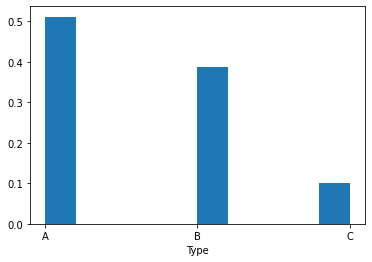


Type A: 51.11321963133359 %
Type B: 38.782408615362755 %
Type C: 10.104371753195295 %


In [ ]:
weights=np.zeros_like(df['Type']) + 1. / (df['Type']).size
n = plt.hist(df['Type'], weights=weights)
plt.xlabel('Type')
plt.show()
print("\nType A: " + str(n[0][0]*100) + " %")
print("Type B: " + str(n[0][5]*100) + " %")
print("Type C: " + str(n[0][9]*100) + " %")

Here we can see that Type A store are more than 50 % so we meed to check on what basis they are classified 

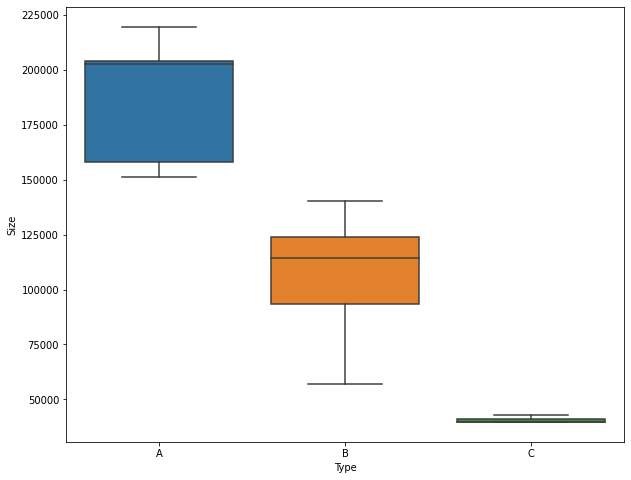

In [ ]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

From here we can clearly see that type of Store are classified based on weekly sales as class A has Higher weekly sales compared to other two classes

In [ ]:
# df.plot(figsize=(20,10))

Here Is_Holiday_X and ISHoliday_Y has same data so we should drop one of them

In [ ]:
df.drop('IsHoliday_y',axis=1)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
df['Weekly_Sales'].describe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

Some Sales minimum values are in negative which is not true so I need to drop rows with the negative value

In [ ]:
df = df.loc[df['Weekly_Sales'] > 0]
df.shape

(420212, 17)

In [ ]:
# df.plot(x='Date',y='Weekly_Sales',ls="dotted",figsize=(12,4))

In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,150181.000000,110904.000000,136651.000000,134518.000000,150929.000000,420212.000000,420212.000000,420212.000000
mean,22.195611,44.241309,16033.114591,60.090599,3.360890,7247.821269,3330.146158,1441.736203,3384.782267,4629.531870,171.212496,7.960000,136749.732787
std,12.787236,30.508819,22729.492116,18.447857,0.458519,8293.028741,9460.395025,9631.968459,6295.136952,5960.171711,39.162445,1.863879,60993.084568
min,1.000000,1.000000,0.010000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2120.130000,46.680000,2.933000,2240.270000,41.600000,5.100000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7661.700000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20271.265000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
new_cols = ["Date","Store",	"Dept"	,"Weekly_Sales"	,"IsHoliday_x",	"Temperature",	"Fuel_Price"	,"MarkDown1"	,"MarkDown2"	,"MarkDown3"	,"MarkDown4"	,"MarkDown5",	"CPI"	,"Unemployment"	,	"Type","Size"]
df=df[new_cols]

In [ ]:
df.head(2)

,Date,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,2010-02-05,1,1,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,2010-02-05,1,2,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
# collection of numeric type features into num_df dataframe
num_df = df.select_dtypes(include=['int64','float64']).copy()
num_df.head()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
0,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
1,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
2,1,3,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
3,1,4,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315
4,1,5,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,151315


Right now we dont have any information about what is Markdown representing and 40-60% of entries are null so we will delete them before moving further

In [ ]:
num_df=num_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

Checking relations among features using HEATMAP

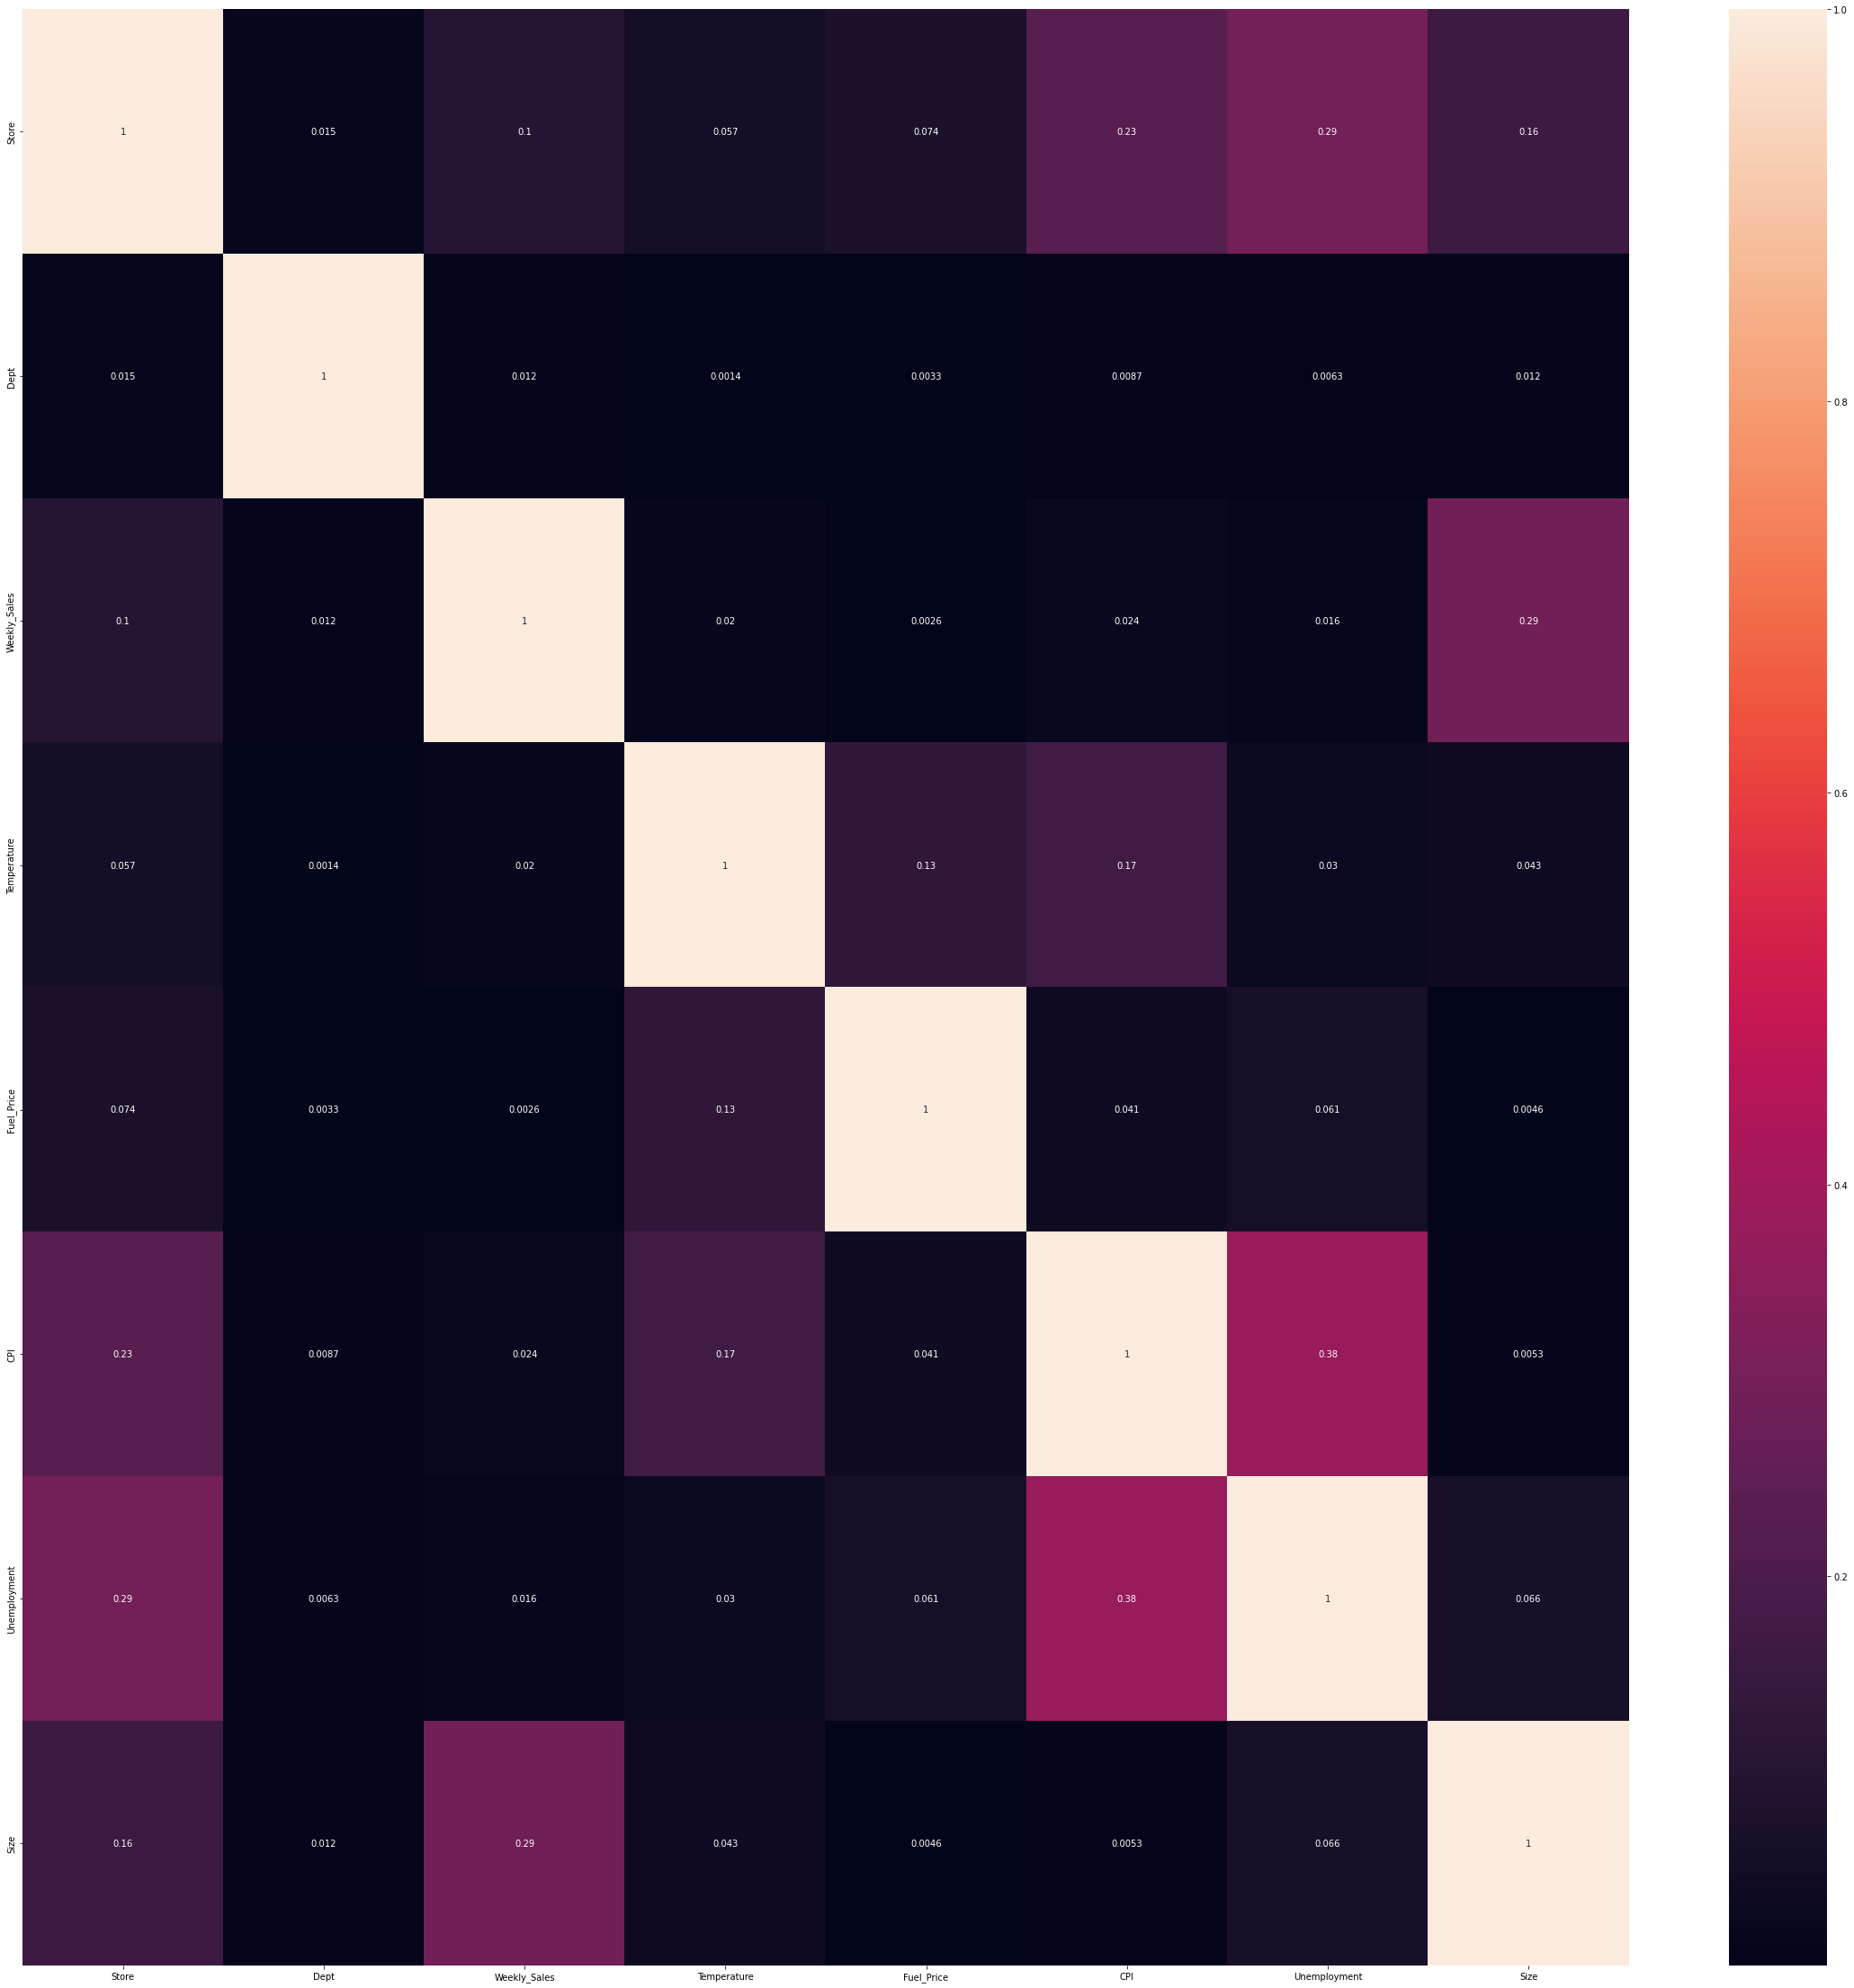

In [ ]:
corrMatrix = num_df.corr(method= 'spearman')
fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(abs(corrMatrix), annot = True)
plt.show()

From the remaining dataset we can see that none of the feature is highly correlated so feature elimination at this stage is not possible

In [ ]:
num_df.isna().sum()


Store           0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Size            0
dtype: int64

In [ ]:
df=df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis=1)

In [ ]:
df.head(2)

,Date,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,2010-02-05,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315


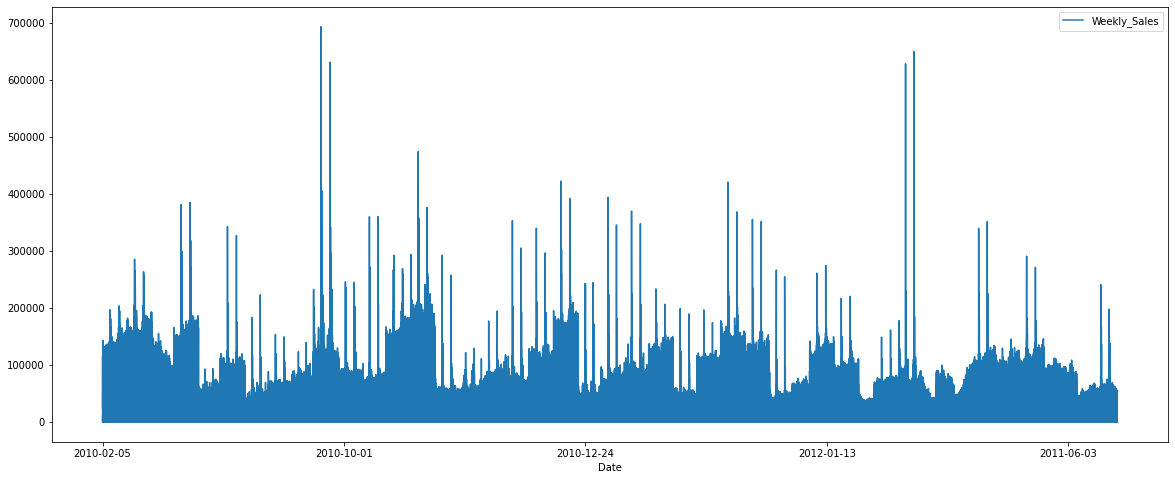

In [ ]:
df.plot(x='Date',y='Weekly_Sales',figsize=(20,8))

In [ ]:
df.groupby('IsHoliday_x')['Weekly_Sales'].mean()

IsHoliday_x
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

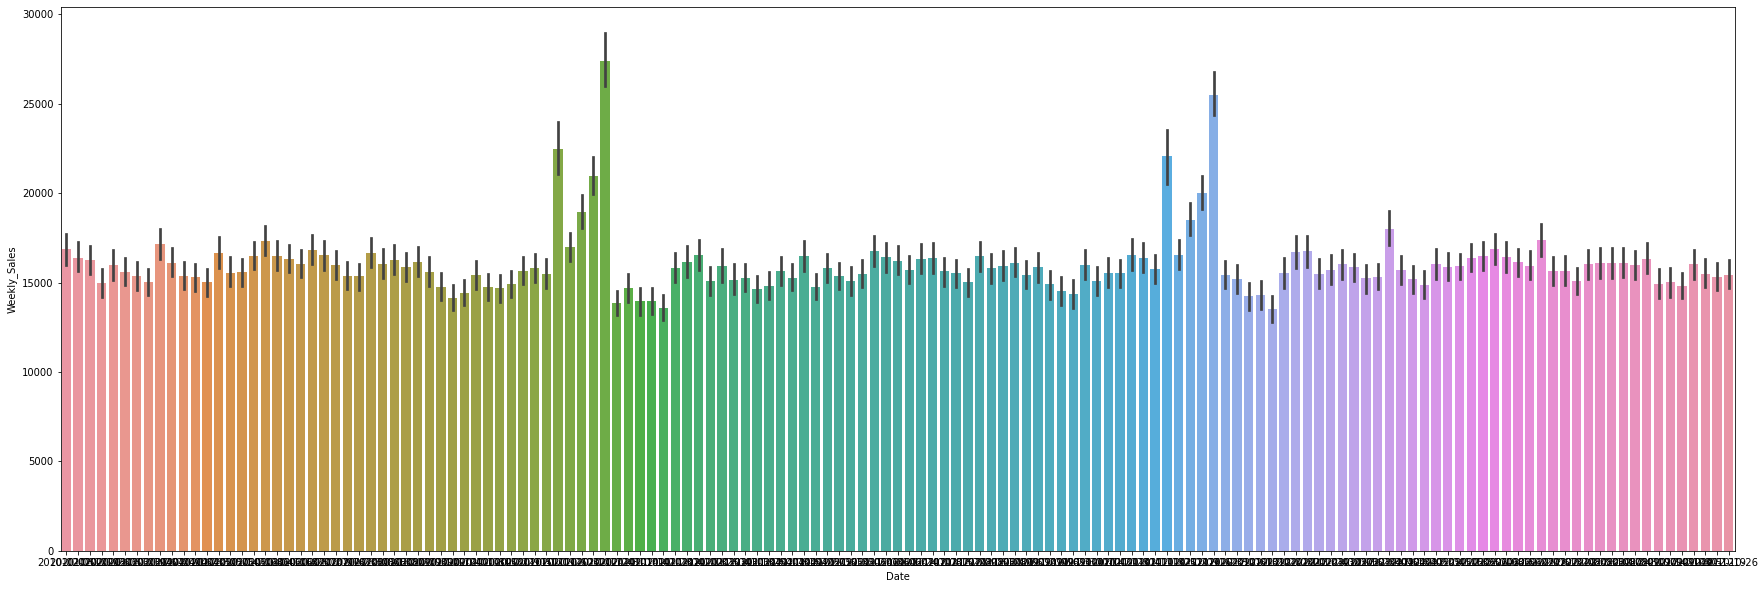

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Date', y='Weekly_Sales', data=df)

We can see that after particular time period there is a pattern repetation in sales data


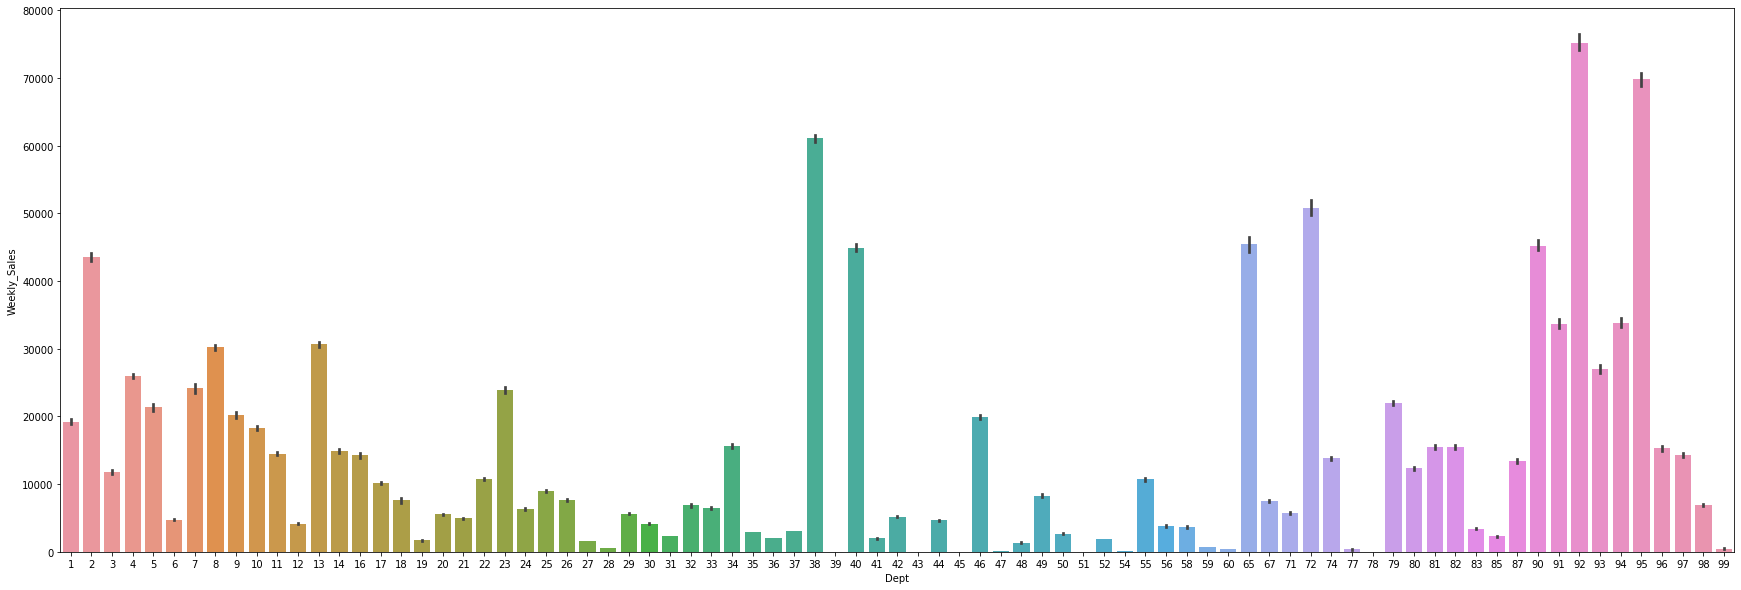

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

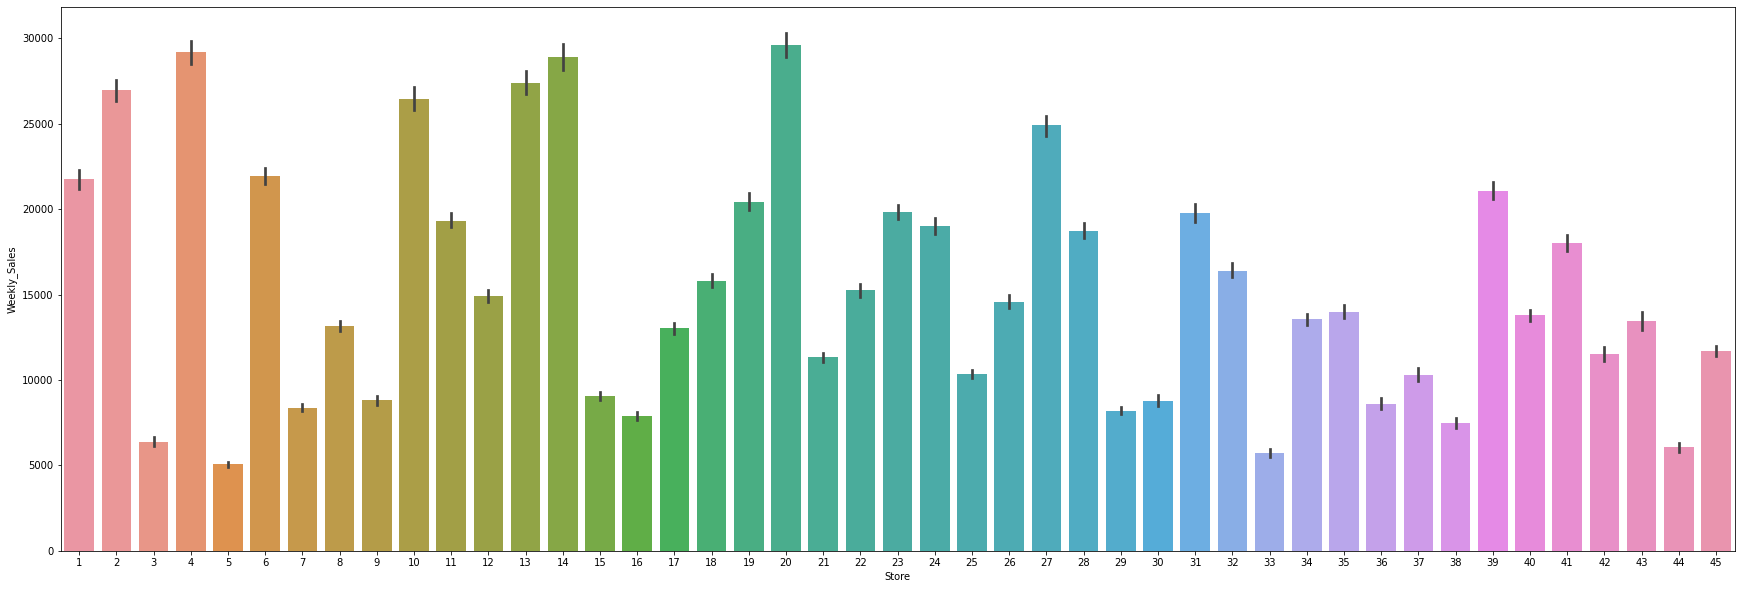

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

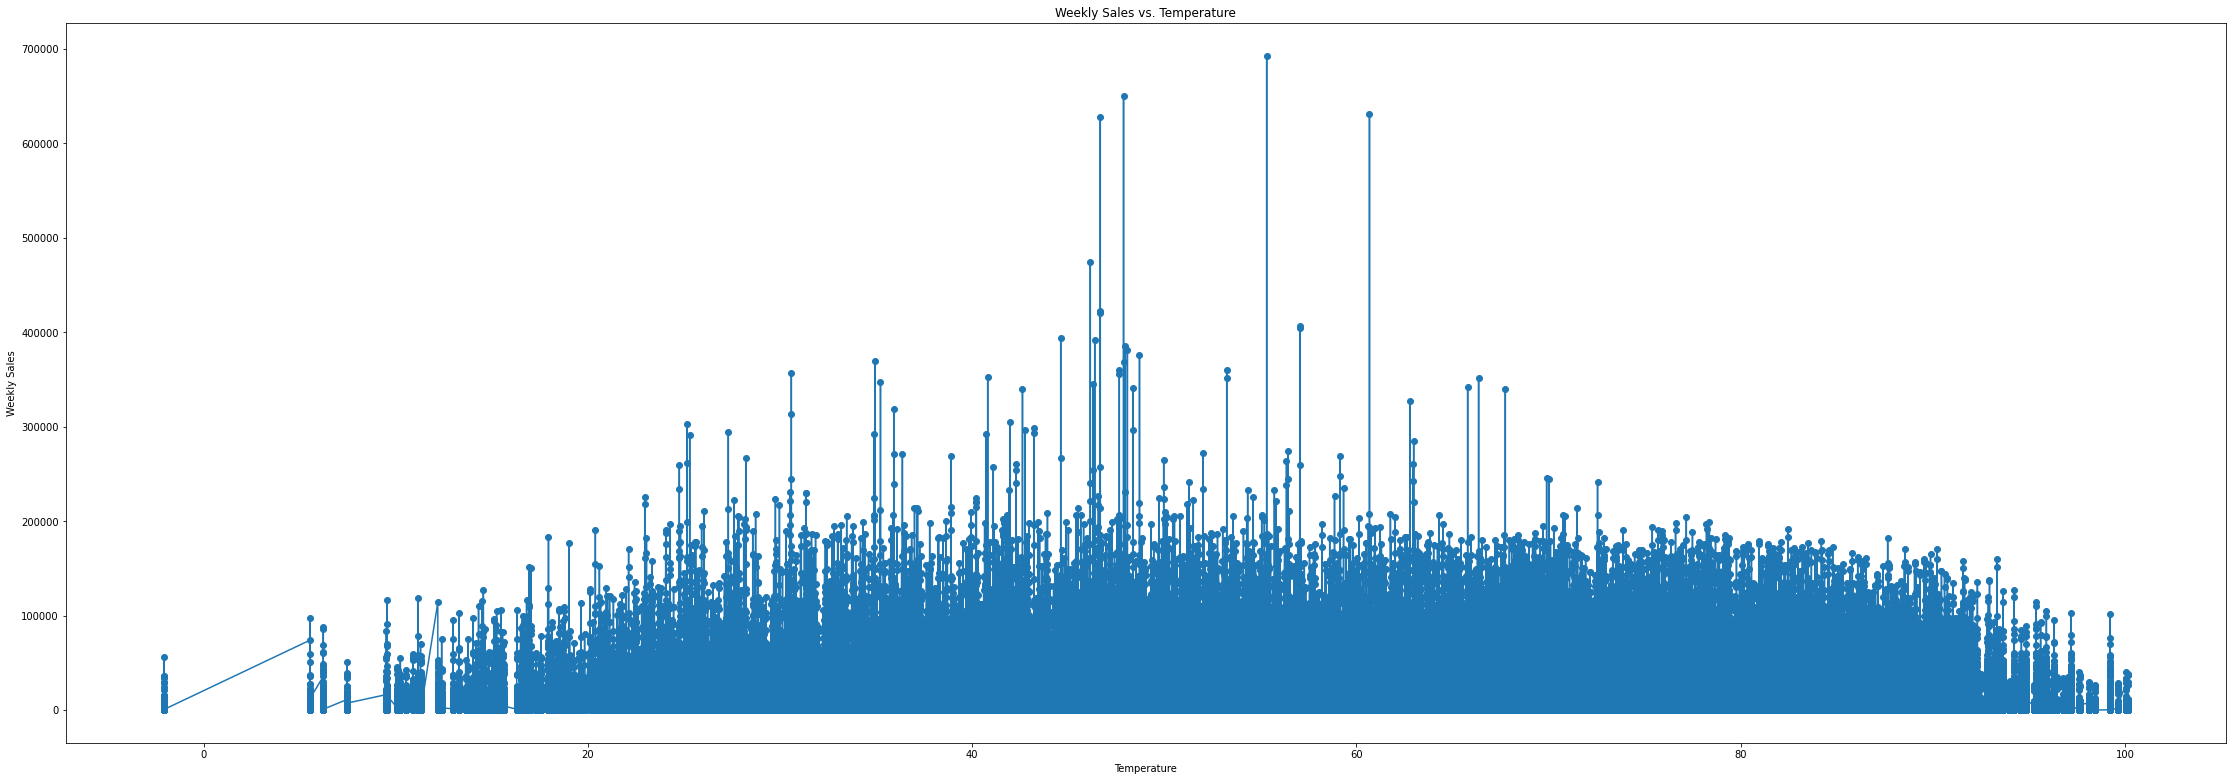

In [ ]:

temp_df = df.sort_values(by='Temperature')
np_arr=temp_df.values
# # Get x & y values and put in array
x_2 = np_arr[:,5]
y_2 =np_arr[:,3]

fig_4 = plt.figure(figsize=(30,10))
axes_4 = fig_4.add_axes([0,0,1,1])
axes_4.set_title('Weekly Sales vs. Temperature')
axes_4.set_xlabel('Temperature')
axes_4.set_ylabel('Weekly Sales')
axes_4.plot(x_2,y_2)
plt.scatter(x_2,y_2)

From the above figure we can see that sales are maximum when temperature is between 40 to 60.

In [ ]:
# sns.pairplot(num_df)

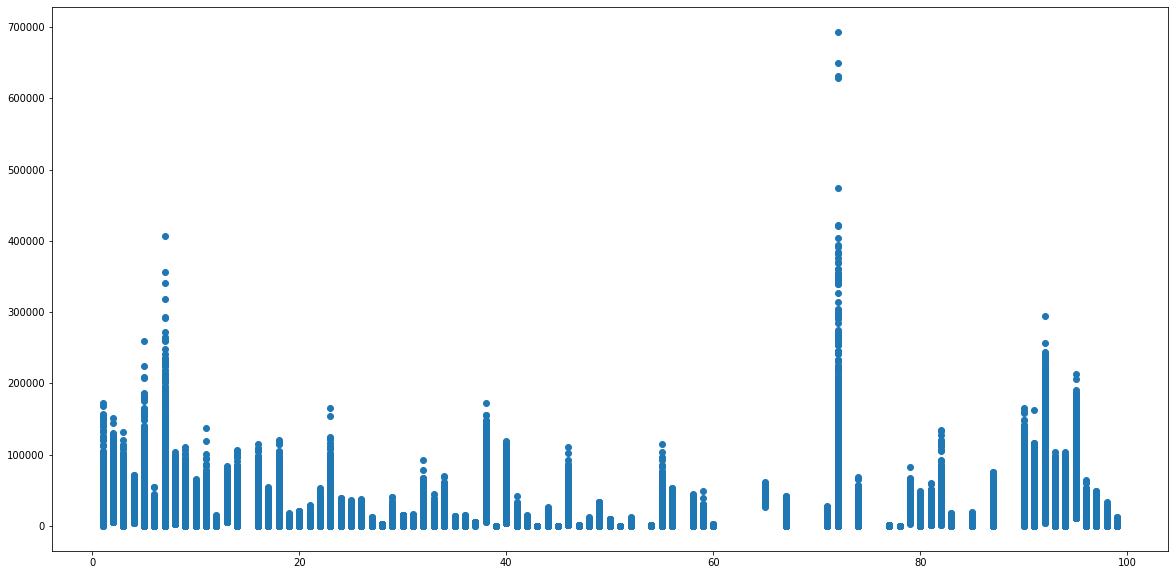

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(df['Dept'],df['Weekly_Sales'])
plt.show()

In [ ]:
# convert to datetime
df["Date"] = pd.to_datetime(df["Date"]) 
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df.head(2)

,Date,Store,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,week,month,year
0,2010-02-05,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010
1,2010-02-05,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,5,2,2010


In [ ]:
df.groupby('month')['Weekly_Sales'].mean()

month
1     14182.239153
2     16048.701191
3     15464.817698
4     15696.435193
5     15845.556200
6     16397.605478
7     15905.472425
8     16113.800069
9     15147.216063
10    15279.182119
11    17534.964277
12    19425.798603
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

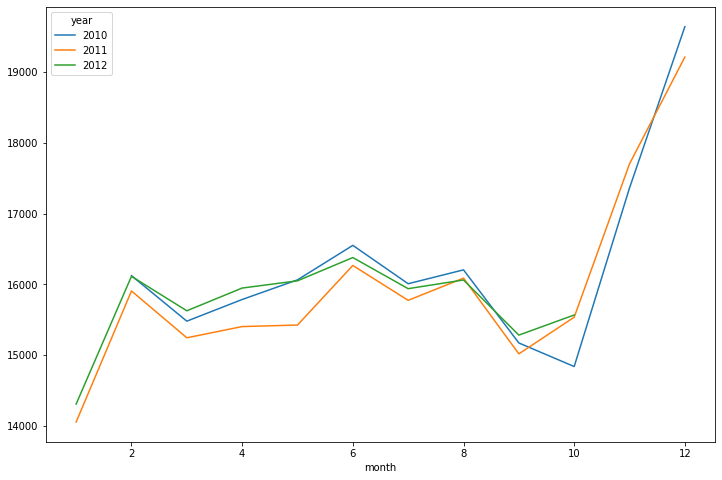

In [ ]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot(figsize=(12,8))

We can see that sales trends in all year is same for given months so we can say that it follows a particular pattern

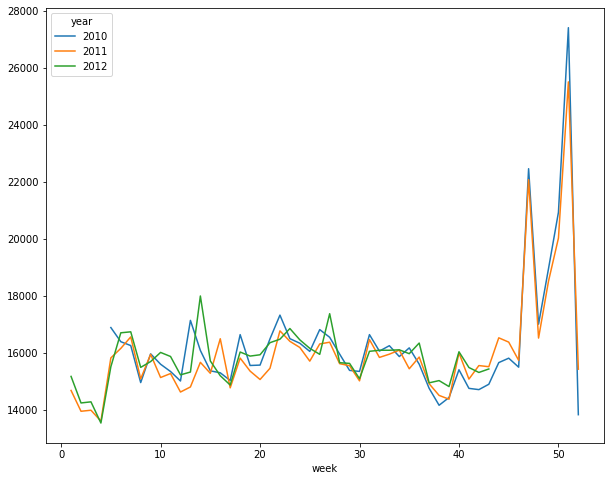

In [ ]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot(figsize=(10,8))

Here we can see that last 2-3 weeks of year has highest sales among the year due to Christmas, Thankgiving and Black Friday

In [ ]:
df=df.drop(['Temperature','CPI','Unemployment'], axis=1)

In [ ]:
df.tail(3)

,Date,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,Type,Size,week,month,year
421567,2012-10-26,45,95,56017.47,False,3.882,B,118221,43,10,2012
421568,2012-10-26,45,97,6817.48,False,3.882,B,118221,43,10,2012
421569,2012-10-26,45,98,1076.80,False,3.882,B,118221,43,10,2012


In [ ]:
df_encoded = df.copy()
df_encoded['IsHoliday_x'] = df_encoded['IsHoliday_x'].astype(bool).astype(int) # changing T,F to 0-1


In [ ]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
df_encoded['Type'] = df_encoded['Type'].replace(type_group)

In [ ]:
df1=df_encoded

In [ ]:
df_new = df1.sort_values(by='Date', ascending=True)
train_data = df_new[:int(0.8*(len(df_new)))] # taking train part
test_data = df_new[int(0.8*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [ ]:
X = df_new[used_cols]

In [ ]:
X = X.drop(['Date'], axis=1) #dropping date column from X

In [ ]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

In [ ]:
def wmae_test(test, pred): # WMAE for test 
    weights = X_test['IsHoliday_x'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

In [ ]:
X_train

,Store,Dept,IsHoliday_x,Fuel_Price,Type,Size,week,month,year
0,1,1,0,2.572,1,151315,5,2,2010
330761,35,3,0,2.784,2,103681,5,2,2010
330762,35,4,0,2.784,2,103681,5,2,2010
330763,35,5,0,2.784,2,103681,5,2,2010
330764,35,6,0,2.784,2,103681,5,2,2010
...,...,...,...,...,...,...,...,...,...
328769,34,83,0,3.881,1,158114,15,4,2012
328768,34,82,0,3.881,1,158114,15,4,2012
328767,34,81,0,3.881,1,158114,15,4,2012
328766,34,80,0,3.881,1,158114,15,4,2012


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)


In [ ]:
wmae_test(y_test, y_pred_test)

3349.002424654988

In [ ]:
pipe.score(X_test,y_test)

0.9439205772034991

In [ ]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [ ]:
X_enc = df_encoded[used_cols1] # to get together train,test splits
X_enc = X_enc.drop(['Date'], axis=1) #dropping date column for whole X
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [ ]:
wmae_test(y_test_enc, y_pred_test_enc)

1613.2124358115407

In [ ]:
pipe.score(X_test_enc,y_test_enc) 

0.7741516744913752

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"]) #changing data to datetime for decomposing

In [ ]:
df1.set_index('Date', inplace=True) #seting date as index

In [ ]:
df1.head(2)

,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,Type,Size,week,month,year
Date,,,,,,,,,,
2010-02-05,1,1,24924.50,0,2.572,1,151315,5,2,2010
2010-02-05,1,2,50605.27,0,2.572,1,151315,5,2,2010


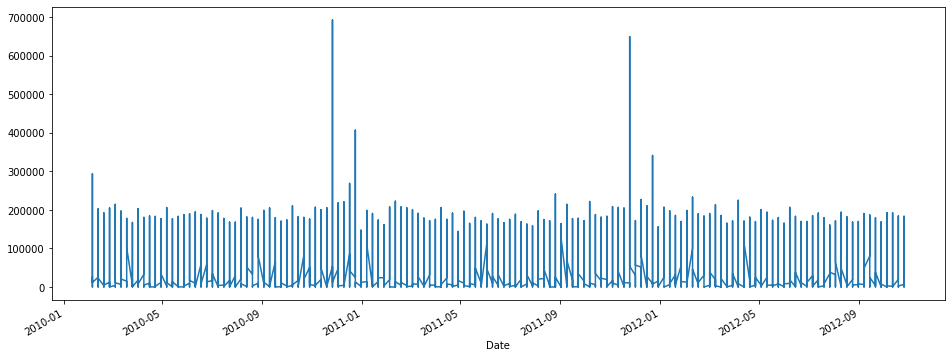

In [ ]:
plt.figure(figsize=(16,6))
df1['Weekly_Sales'].plot()
plt.show()

In [ ]:
df2=df1

In [ ]:
df2.resample(rule='A').min()

,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,Type,Size,week,month,year,Weekly_Sales:30 days rolling,Weekly_Sales:EMA_5 days
Date,,,,,,,,,,,,
2010-12-31,1,1,0.01,0,2.472,1,34875,5,2,2010,1308.175333,54.295137
2011-12-31,1,1,0.01,0,2.882,1,34875,1,1,2011,1189.187333,38.891592
2012-12-31,1,1,0.01,0,3.031,1,34875,1,1,2012,1476.202667,48.403642


In [ ]:
df2.resample(rule='A').max()

,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,Type,Size,week,month,year,Weekly_Sales:30 days rolling,Weekly_Sales:EMA_5 days
Date,,,,,,,,,,,,
2010-12-31,45,99,693099.36,1,3.336,3,219622,52,12,2010,74644.723333,239546.342226
2011-12-31,45,99,649770.18,1,4.211,3,219622,52,12,2011,71952.027667,224463.958492
2012-12-31,45,99,233140.32,1,4.468,3,219622,43,10,2012,57356.756000,123012.904317


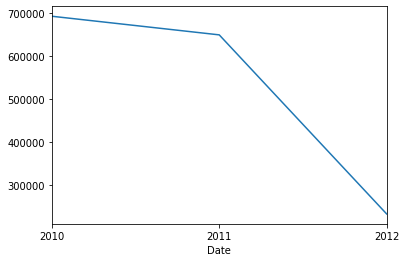

In [ ]:
df2.resample(rule='A').max()['Weekly_Sales'].plot()

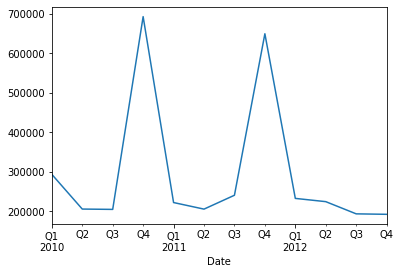

In [ ]:
df2.resample(rule='QS').max()['Weekly_Sales'].plot()

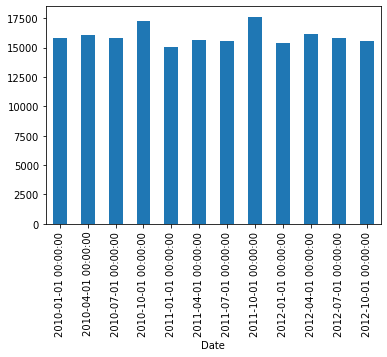

In [ ]:

df2['Weekly_Sales'].resample(rule='QS').mean().plot(kind='bar')

In [ ]:
df2['Weekly_Sales:30 days rolling']=df1['Weekly_Sales'].rolling(30).mean()

In [ ]:
df2.head(31)

,Store,Dept,Weekly_Sales,IsHoliday_x,Fuel_Price,Type,Size,week,month,year,Weekly_Sales:30 days rolling,Weekly_Sales:EMA_5 days
Date,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,2.572,1,151315,5,2,2010,NaN,24924.500000
2010-02-05,1,2,50605.27,0,2.572,1,151315,5,2,2010,NaN,40332.962000
2010-02-05,1,3,13740.12,0,2.572,1,151315,5,2,2010,NaN,27736.352632
2010-02-05,1,4,39954.04,0,2.572,1,151315,5,2,2010,NaN,32811.392000
2010-02-05,1,5,32229.38,0,2.572,1,151315,5,2,2010,NaN,32587.965592
2010-02-05,1,6,5749.03,0,2.572,1,151315,5,2,2010,NaN,22780.655293
2010-02-05,1,7,21084.08,0,2.572,1,151315,5,2,2010,NaN,22179.973706
2010-02-05,1,8,40129.01,0,2.572,1,151315,5,2,2010,NaN,28405.912227
2010-02-05,1,9,16930.99,0,2.572,1,151315,5,2,2010,NaN,24478.784548


In [ ]:
df_week = df1.resample('W').mean() #resample data as weekly

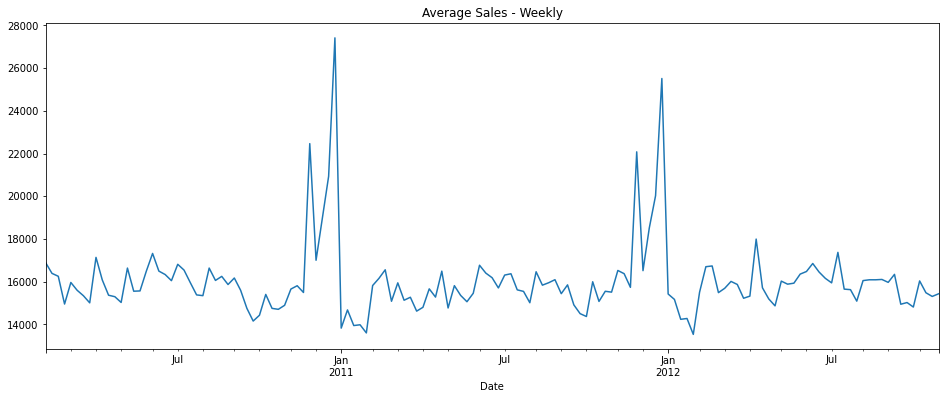

In [ ]:
plt.figure(figsize=(16,6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.show()

In [ ]:
df_month = df1.resample('MS').mean() # resampling as monthly

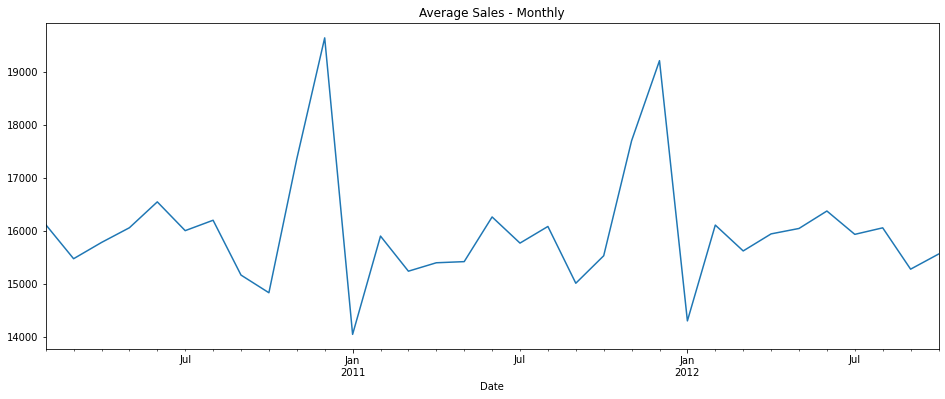

In [ ]:
plt.figure(figsize=(16,6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.show()

# Rolling Mean

In [ ]:
# finding 2-weeks rolling mean and std
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

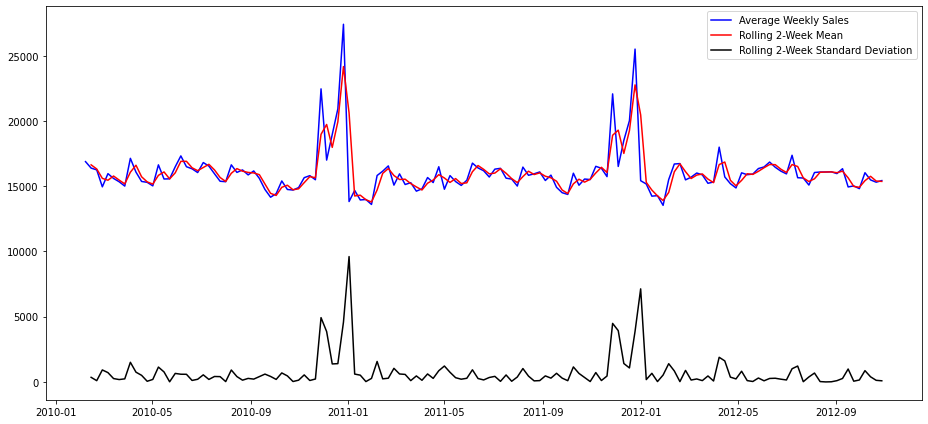

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue',label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

adfuller(df_week['Weekly_Sales'])

(-5.927107223737572,
 2.4290492082042356e-07,
 4,
 138,
 {'1%': -3.47864788917503,
  '10%': -2.578065326612056,
  '5%': -2.882721765644168},
 2261.596421168073)

In [ ]:
train_data = df_week[:int(0.7*(len(df_week)))] 
test_data = df_week[int(0.7*(len(df_week))):]

print('Train:', train_data.shape)
print('Test:', test_data.shape)

Train: (100, 10)
Test: (43, 10)


In [ ]:
target = "Weekly_Sales"
used_cols = [c for c in df_week.columns.to_list() if c not in [target]] # all columns except price

# assigning train-test X-y values

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

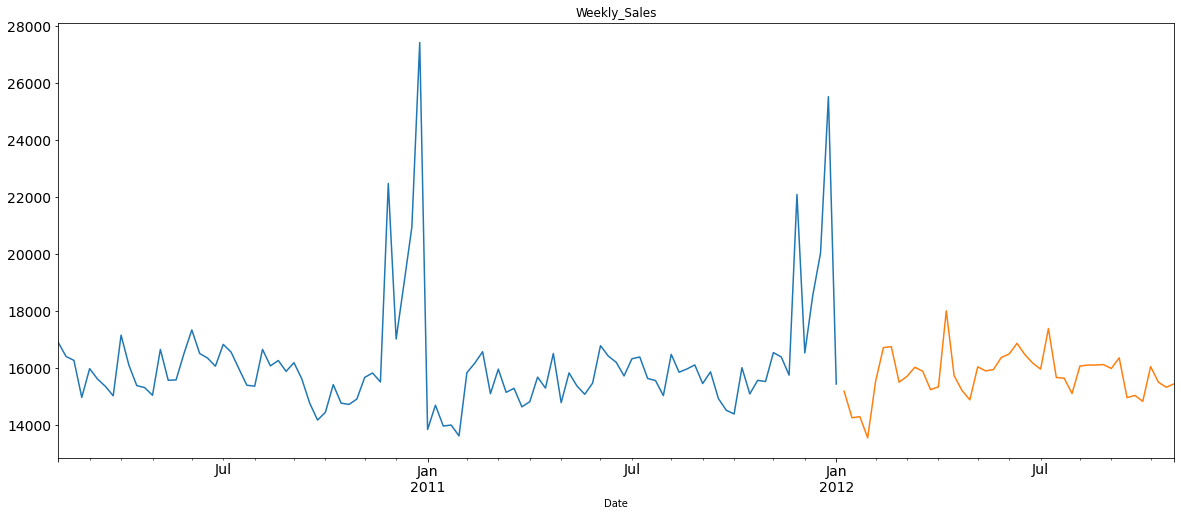

In [ ]:
train_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
test_data['Weekly_Sales'].plot(figsize=(20,8), title= 'Weekly_Sales', fontsize=14)
plt.show()

Blue Line represents trained data and yellow represents test data

In [ ]:

from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima
decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20) #decomposing of weekly data 

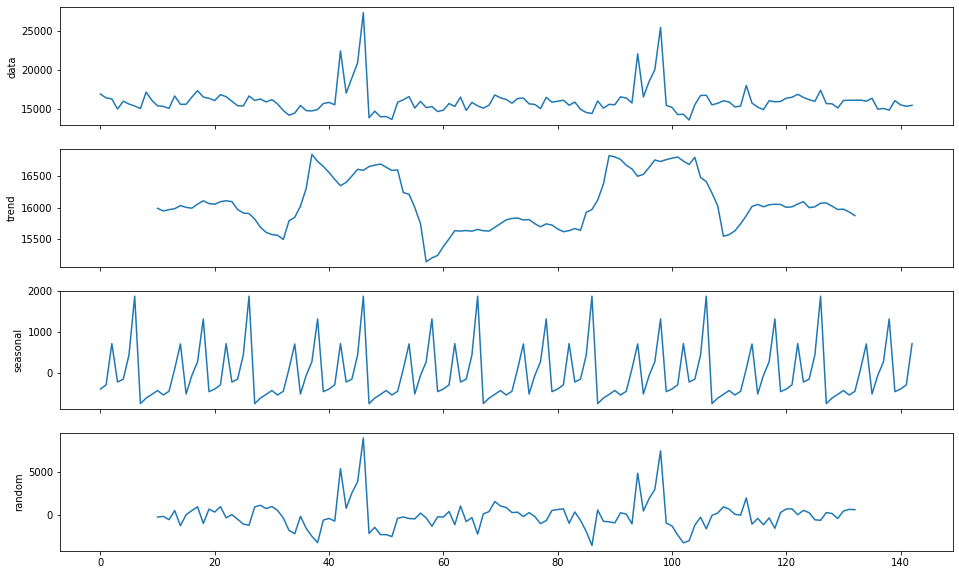

In [ ]:
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

In [ ]:
df_week_diff = df_week['Weekly_Sales'].diff().dropna() #creating difference values

In [ ]:
# taking mean and std of differenced data
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

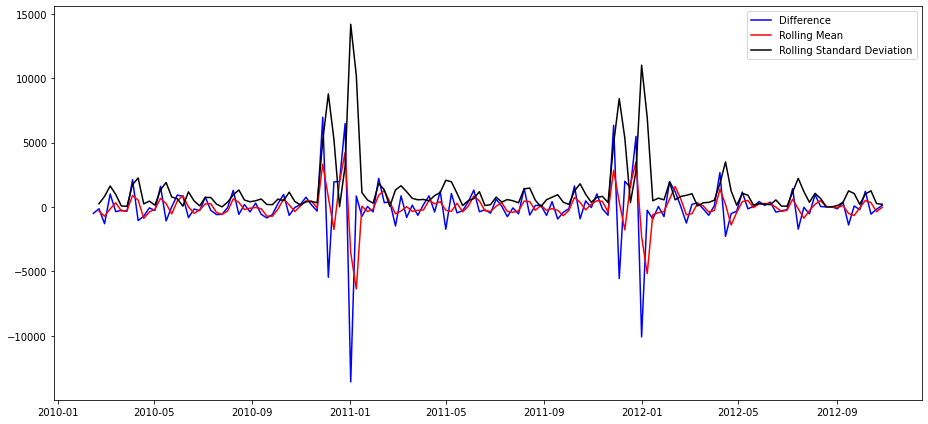

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue',label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
df_week_lag = df_week['Weekly_Sales'].shift().dropna() #shifting the data 

In [ ]:
lag_roll_mean = df_week_lag.rolling(window=2, center=False).mean() 
lag_roll_std = df_week_lag.rolling(window=2, center=False).std()

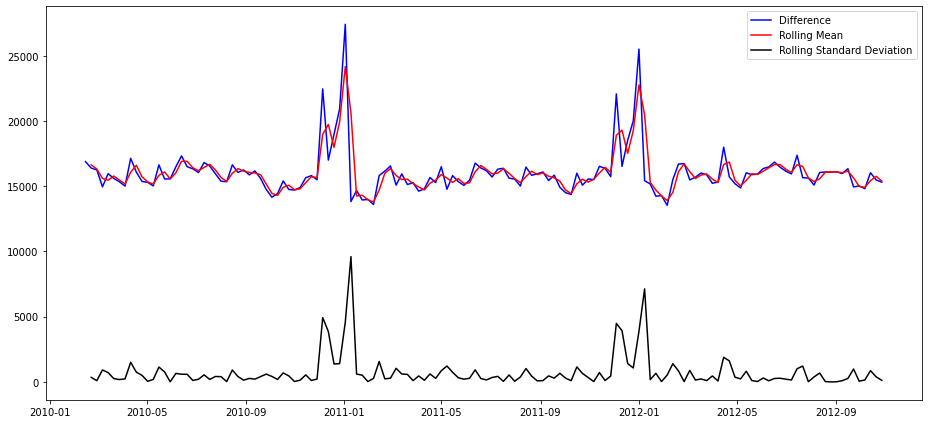

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_lag, color='blue',label='Difference')
ax.plot(lag_roll_mean, color='red', label='Rolling Mean')
ax.plot(lag_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
logged_week = np.log1p(df_week['Weekly_Sales']).dropna() #taking log of data

In [ ]:
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

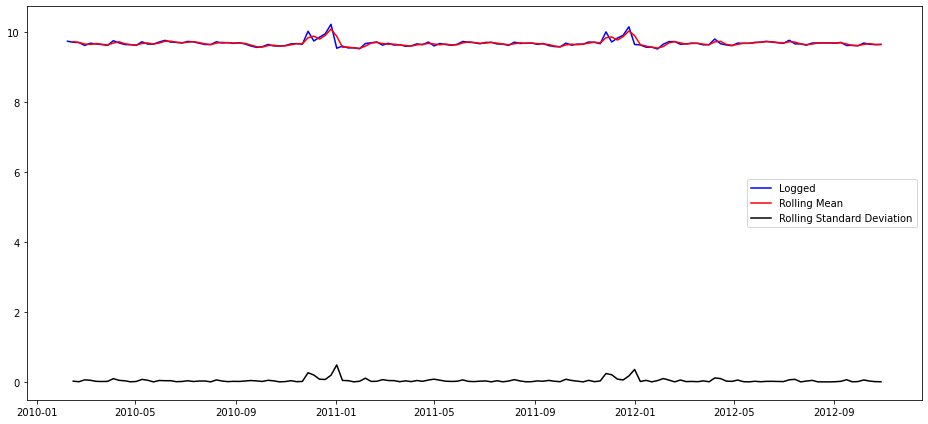

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue',label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
fig.tight_layout()

In [ ]:
train_data_diff = df_week_diff [:int(0.7*(len(df_week_diff )))]
test_data_diff = df_week_diff [int(0.7*(len(df_week_diff ))):]

In [ ]:
# train_data = train_data['Weekly_Sales']
# test_data = test_data['Weekly_Sales']

model_auto_arima = auto_arima(train_data_diff, trace=True,start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=20, max_q=20, max_P=20, max_Q=20, seasonal=True,maxiter=200,
                  information_criterion='aic',stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='ignore',approximation = False)
model_auto_arima.fit(train_data_diff)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.35 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.21 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.60 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=1791.045, Tim

ARIMA(maxiter=200, order=(3, 0, 2), scoring_args={},
      seasonal_order=(0, 0, 0, 1), suppress_warnings=True)

In [ ]:
test_data.shape

(43, 10)

# ARIMA

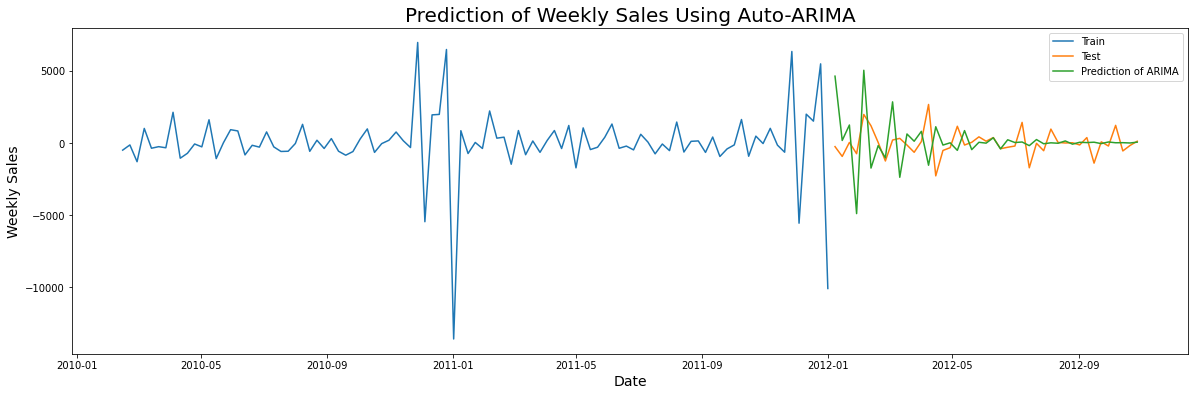

In [ ]:
y_pred = model_auto_arima.predict(n_periods=len(test_data_diff))
y_pred = pd.DataFrame(y_pred,index = test_data.index,columns=['Prediction'])
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
wmae_test(test_data_diff, y_pred)

2012-01-08 00:00:00    0.0
2012-01-15 00:00:00    0.0
2012-01-22 00:00:00    0.0
2012-01-29 00:00:00    0.0
2012-02-05 00:00:00    0.0
2012-02-12 00:00:00    0.0
2012-02-19 00:00:00    0.0
2012-02-26 00:00:00    0.0
2012-03-04 00:00:00    0.0
2012-03-11 00:00:00    0.0
2012-03-18 00:00:00    0.0
2012-03-25 00:00:00    0.0
2012-04-01 00:00:00    0.0
2012-04-08 00:00:00    0.0
2012-04-15 00:00:00    0.0
2012-04-22 00:00:00    0.0
2012-04-29 00:00:00    0.0
2012-05-06 00:00:00    0.0
2012-05-13 00:00:00    0.0
2012-05-20 00:00:00    0.0
2012-05-27 00:00:00    0.0
2012-06-03 00:00:00    0.0
2012-06-10 00:00:00    0.0
2012-06-17 00:00:00    0.0
2012-06-24 00:00:00    0.0
2012-07-01 00:00:00    0.0
2012-07-08 00:00:00    0.0
2012-07-15 00:00:00    0.0
2012-07-22 00:00:00    0.0
2012-07-29 00:00:00    0.0
2012-08-05 00:00:00    0.0
2012-08-12 00:00:00    0.0
2012-08-19 00:00:00    0.0
2012-08-26 00:00:00    0.0
2012-09-02 00:00:00    0.0
2012-09-09 00:00:00    0.0
2012-09-16 00:00:00    0.0
2

#Exponential Smooting

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


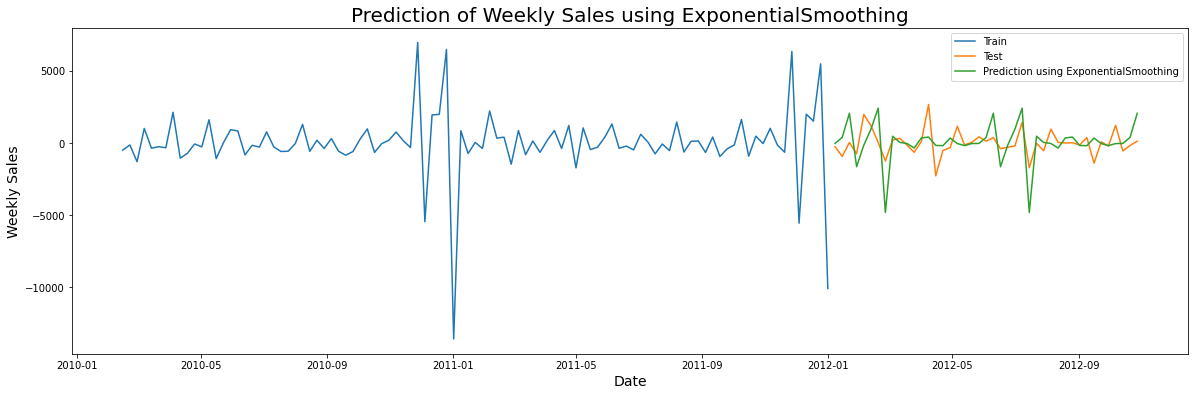

In [ ]:
model_holt_winters = ExponentialSmoothing(train_data_diff, seasonal_periods=20, seasonal='additive',
                                           trend='additive',damped=True).fit() #Taking additive trend and seasonality.
y_pred = model_holt_winters.forecast(len(test_data_diff))# Predict the test data

#Visualize train, test and predicted data.
plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

In [ ]:
wmae_test(test_data_diff, y_pred)

840.681060966696

In [ ]:
# df1[['Weekly_Sales','Weekly_Sales:30 days rolling']].mean().plot(figsize=(20,8))

In [ ]:
# df1['Weekly_Sales:EMA_5 days']=df1['Weekly_Sales'].ewm(span=5).mean()

In [ ]:
# df1['Weekly_Sales:EMA_5 days']

**Performed Data visualization and data cleaning and feature Engineering**

**Perform univariant analysis on catagorical dataset**

**Used TIme series analysis to predict the future sales using Rolling Mean , ARIMA and Exponential Smoothing Model**

**Exponential Smoothing model gave best result of 840 with 4-5% error of average sales values**